In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime = pd.read_csv('C:/Users/sdstc/Documents/Education/Other/Entity Academy/Intermediate Statistics/Hands On/anime.csv')

# Is a Rating Score of 6.2 Different from the Mean in this Dataset?

<AxesSubplot:>

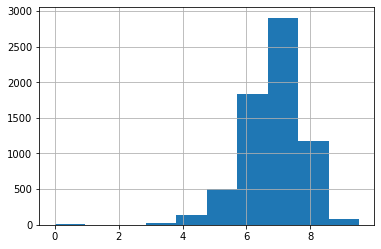

In [4]:
anime['score'].hist()

## Things appear to be normally distributed.

In [5]:
stats.ttest_1samp(anime['score'], 6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

## The statistic is your t-value, and the p-value is the one associated with that t-test. The p value is less than 0.05 which qualifies this test as significant. This also means that the rating of 6.2 is different from the population mean.

In [6]:
anime.score.mean()

6.848998200359928

### The average rating for anime was 6.8. So an anime with a rating of 6.2 would fair a little below the average.

# Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

<AxesSubplot:>

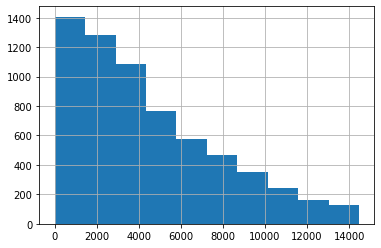

In [7]:
anime.popularity[anime.status == 'Finished Airing'].hist()

<AxesSubplot:>

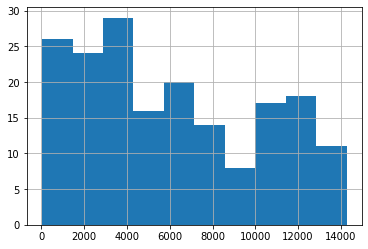

In [9]:
anime.popularity[anime.status == 'Currently Airing'].hist()

## It appears as though animes that had Finished Airing exhibited a negative or downward distribution that almost appears linear, if not linear in its entirety. The animes that were Currently Airing lacked a normal distribution. From this we can tell that the popularity of the animes that have Finished Airing was more than likely to experience a more steady decline in number than those that are Currently Airing.

In [10]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747446e-11)

## With such a small t statistic, being in the negative and a p vaue greater than 0.05, it is safe to say that there is definitely no signfiicant difference between popularity in anime that is currently airing to those that have finished airing.

# Does the Source of the Anime Influence the Type of Anime?

In [14]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


In [16]:
anime_crosstab = pd.crosstab(anime['source'], anime['type'])

In [17]:
anime_crosstab

type,Movie,Music,ONA,OVA,Special,TV
source,,,,,,
4-koma manga,9,0,11,22,41,111
Book,19,0,0,2,0,24
Card game,5,0,0,0,7,34
Digital manga,0,0,0,1,0,6
Game,78,9,39,57,65,176
Light novel,49,0,14,86,96,267
Manga,324,12,82,586,335,1154
Music,2,42,0,1,0,10
Novel,69,1,31,31,33,117


In [18]:
stats.chi2_contingency(anime_crosstab)

(3026.100282147132,
 0.0,
 70,
 array([[2.64175165e+01, 2.85122975e+00, 1.18704259e+01, 3.91316737e+01,
         2.70284943e+01, 8.67006599e+01],
        [6.12777445e+00, 6.61367726e-01, 2.75344931e+00, 9.07693461e+00,
         6.26949610e+00, 2.01109778e+01],
        [6.26394721e+00, 6.76064787e-01, 2.81463707e+00, 9.27864427e+00,
         6.40881824e+00, 2.05578884e+01],
        [9.53209358e-01, 1.02879424e-01, 4.28314337e-01, 1.41196761e+00,
         9.75254949e-01, 3.12837433e+00],
        [5.77372525e+01, 6.23155369e+00, 2.59436113e+01, 8.55248950e+01,
         5.90725855e+01, 1.89490102e+02],
        [6.97204559e+01, 7.52489502e+00, 3.13281344e+01, 1.03275345e+02,
         7.13329334e+01, 2.28818236e+02],
        [3.39478704e+02, 3.66397720e+01, 1.52541092e+02, 5.02862178e+02,
         3.47330084e+02, 1.11414817e+03],
        [7.48950210e+00, 8.08338332e-01, 3.36532693e+00, 1.10940312e+01,
         7.66271746e+00, 2.45800840e+01],
        [3.84007199e+01, 4.14457109e+00, 1.725494

## The Chi-Square is 3026.10 with a p value of 0.0. Looking at this, it looks like there is a significant relationship between anime source and anime type. The Original and Manga are in the lead for OVA and Movies.

# How do the Variables about Popularity / Ranking Relate to Each Other?

In [19]:
anime['popularity'].corr(anime['rank'])

0.7773024303272644

## The popularity of an anime and the ranking of an anime are quite related. 0.77 is a strong correlation that is rather close to 1. This correlation is also positive, which means that as the popularity of an anime increases, so does the rank, and vice versa.

In [23]:
anime1 = anime.drop(['anime_id','title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'], axis = 1)

In [25]:
anime1.head()

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579
2,7.55,37129,1508.0,1173,70127,802
3,8.21,36501,307.0,916,93312,3344
4,8.67,107767,50.0,426,182765,2082


In [26]:
anime1.corr(method='pearson')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094
scored_by,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949
rank,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503
popularity,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745
members,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565
favorites,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000


In [28]:
anime1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


<AxesSubplot:>

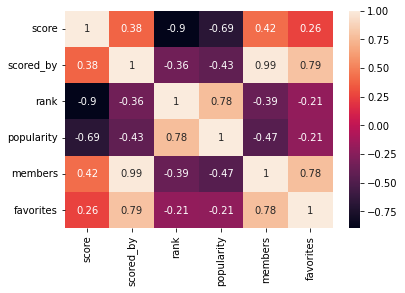

In [29]:
sns.heatmap(anime1.corr(), annot=True)